In [1]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

import spotipy
import spotipy.util as util
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy.oauth2 as oauth2

In [2]:
print("Connected!")

Connected!


# Spotify Login

In [3]:
# %env SPOTIPY_CLIENT_ID = '37f46f7e360c4a27a569aa55b11965c8%en'
# %env SPOTIPY_CLIENT_SECRET = '8874eecd7c7f467b89d006e0d7584310'
# %env SPOTIPY_REDIRECT_URI = "http://www.example.com/callback/"
SPOTIPY_CLIENT_ID = '37f46f7e360c4a27a569aa55b11965c8'
SPOTIPY_CLIENT_SECRET = '8874eecd7c7f467b89d006e0d7584310'
SPOTIPY_REDIRECT_URI = "http://www.example.com/callback/"

username = "rocker517"

In [4]:
client_credentials_manager = SpotifyClientCredentials(client_id=SPOTIPY_CLIENT_ID, client_secret=SPOTIPY_CLIENT_SECRET) 
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [5]:
# scope = 'user-top-read'
# token = util.prompt_for_user_token(username, scope, SPOTIPY_CLIENT_ID, SPOTIPY_CLIENT_SECRET, SPOTIPY_REDIRECT_URI)


# Input Data

In [6]:
user = "rahulb517"
good_playlist = sp.user_playlist(user, "5TNQpKY83LuxSZTrlBvsPq")
bad_playlist = sp.user_playlist(user, "2fK9mxtU8Sm8YES5FgsjJl")

In [7]:
good_tracks = good_playlist["tracks"]
good_songs = good_tracks["items"]
while good_tracks['next']:
    good_tracks = sp.next(good_tracks)
    for item in good_tracks["items"]:
        good_songs.append(item)

good_ids = []
print(len(good_songs))
for i in range(len(good_songs)):
    good_ids.append(good_songs[i]['track']['id'])
# good_tracks


bad_tracks = bad_playlist["tracks"]
bad_songs = bad_tracks["items"]
while bad_tracks['next']:
    bad_tracks = sp.next(bad_tracks)
    for item in bad_tracks["items"]:
        bad_songs.append(item)

bad_ids = []
print(len(bad_songs))
for i in range(len(bad_songs)):
    if(bad_songs[i]['track']['id']):
        bad_ids.append(bad_songs[i]['track']['id'])
bad_ids

622
668


['23q6Nowh5GeqtY5jTDzKyQ',
 '4e4fqjx0Izh4svvTef1z7e',
 '16kqEZBfhhK8XlQpauKej1',
 '0i5el041vd6nxrGEU8QRxy',
 '3cU2wBxuV6nFiuf6PJZNlC',
 '5jE48hhRu8E6zBDPRSkEq7',
 '6gj08XDlv9Duc2fPOxUmVD',
 '6cPyTS0Kk2sc4xQwC93kOg',
 '5xhJmd0I15jFcEdqxfCzKk',
 '6KjbNLbRjuoa8rEq5yNA6H',
 '6GeD5g9vZTz25Egf8kxoIY',
 '1KeZgPUr54C8iz3FjqzVoz',
 '2B1fuWoWaYnCXbjYp1gXg5',
 '2RSHsoi04658QL5xgQVov3',
 '3R4Xk37WTagjzODMNEQLvs',
 '4qhDA6s0MkD5XpDqGLHIEY',
 '5d41vXH0zvpwUrHrmqKqDc',
 '1HOlb9rdNOmy9b1Fakicjo',
 '7GGlr1GkWjre2lo69N0rVk',
 '463PQggkmk5tTw8ug0ahOX',
 '3ucRKbRlikYHyoI17gfR0c',
 '2ynqtdm2zE73wuNKjGItwp',
 '6FVcrCsKQGojuZuDITxkOA',
 '2S1LebN6AXXQqJolBxlWgO',
 '3dRO9sXNCYhfenuLiz7Btr',
 '5cgcfNRYuyUsn2wWOcFO0j',
 '2KEWMwCDnEqY0r3iiCO8U3',
 '1DdUn6jqqSYR9jPPCvthJ5',
 '2d8JP84HNLKhmd6IYOoupQ',
 '14PlDNjNh3pXyHXzkhX8n5',
 '5NQbUaeTEOGdD6hHcre0dZ',
 '4NhDYoQTYCdWHTvlbGVgwo',
 '5KhFaq45chTw8RGfWo8T8J',
 '2vjmyyAnDUzilFYxOlTdO1',
 '6CUP2khYzdphXebxVTfPE3',
 '6YAxCn4juTWn5hWl2hzHGw',
 '6vxU64pcIuQ38O015Zy4qj',
 

In [8]:
features = []

#features.append(sp.audio_features(good_ids[0]))
track_num = 0
for i in range(0,len(good_ids), 100): #can only get features for 100 tracks at a time
    tracks = sp.audio_features(good_ids[i:i+100])
    for track in tracks:
        if track:
            features.append(track) #eliminate None type
        features.append(track)
        pop = good_songs[track_num]
        track_num = track_num + 1
        features[-1]['trackPopularity'] = pop['track']['popularity'] #add track popularity to feature matrix
        features[-1]['rating'] = '1' #indicates good song       
#print(features)

In [9]:
track_num = 0
for i in range(0, len(bad_ids), 100): #can only get features for 100 tracks at a time
    tracks = sp.audio_features(bad_ids[i:i+100])
    for track in tracks:
        if track:
            features.append(track)
        pop = bad_songs[track_num]
        track_num = track_num + 1
        features[-1]['trackPopularity'] = pop['track']['popularity'] #add track popularity to feature matrix
        features[-1]['rating'] = '0' #indicates bad song

# Data Modelling

In [10]:
trainingData = pd.DataFrame(features)
trainingData['rating'] = trainingData['rating'].astype(int)
trainingData.head()

,acousticness,analysis_url,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,rating,speechiness,tempo,time_signature,trackPopularity,track_href,type,uri,valence
0,0.975,https://api.spotify.com/v1/audio-analysis/1BVi...,0.377,334570,0.2550,1BViPjTT585XAhkUUrkts0,0.000208,4,0.102,-11.165,0,1,0.0387,125.004,5,66,https://api.spotify.com/v1/tracks/1BViPjTT585X...,audio_features,spotify:track:1BViPjTT585XAhkUUrkts0,0.370
1,0.975,https://api.spotify.com/v1/audio-analysis/1BVi...,0.377,334570,0.2550,1BViPjTT585XAhkUUrkts0,0.000208,4,0.102,-11.165,0,1,0.0387,125.004,5,66,https://api.spotify.com/v1/tracks/1BViPjTT585X...,audio_features,spotify:track:1BViPjTT585XAhkUUrkts0,0.370
2,0.784,https://api.spotify.com/v1/audio-analysis/2LMk...,0.444,248808,0.0924,2LMkwUfqC6S6s6qDVlEuzV,0.000000,0,0.304,-15.605,1,1,0.0366,108.917,4,73,https://api.spotify.com/v1/tracks/2LMkwUfqC6S6...,audio_features,spotify:track:2LMkwUfqC6S6s6qDVlEuzV,0.219
3,0.784,https://api.spotify.com/v1/audio-analysis/2LMk...,0.444,248808,0.0924,2LMkwUfqC6S6s6qDVlEuzV,0.000000,0,0.304,-15.605,1,1,0.0366,108.917,4,73,https://api.spotify.com/v1/tracks/2LMkwUfqC6S6...,audio_features,spotify:track:2LMkwUfqC6S6s6qDVlEuzV,0.219
4,0.420,https://api.spotify.com/v1/audio-analysis/7eqo...,0.466,307151,0.5480,7eqoqGkKwgOaWNNHx90uEZ,0.000001,5,0.113,-9.362,0,1,0.1180,89.815,4,78,https://api.spotify.com/v1/tracks/7eqoqGkKwgOa...,audio_features,spotify:track:7eqoqGkKwgOaWNNHx90uEZ,0.423


In [11]:
train, test =  train_test_split(trainingData, test_size = 0.15)
print("Training size: {}, Test size: {}".format(len(train), len(test)))

Training size: 1622, Test size: 287


In [12]:
pos_tempo = trainingData[trainingData['rating'] == 1]['tempo']
neg_tempo = trainingData[trainingData['rating'] == 0]['tempo']

pos_signature = trainingData[trainingData['rating'] == 1]['time_signature']
neg_signature = trainingData[trainingData['rating'] == 0]['time_signature']

pos_dance = trainingData[trainingData['rating'] == 1]['danceability']
neg_dance = trainingData[trainingData['rating'] == 0]['danceability']
pos_duration = trainingData[trainingData['rating'] == 1]['duration_ms']
neg_duration = trainingData[trainingData['rating'] == 0]['duration_ms']
pos_loudness = trainingData[trainingData['rating'] == 1]['loudness']
neg_loudness = trainingData[trainingData['rating'] == 0]['loudness']
pos_speechiness = trainingData[trainingData['rating'] == 1]['speechiness']
neg_speechiness = trainingData[trainingData['rating'] == 0]['speechiness']
pos_valence = trainingData[trainingData['rating'] == 1]['valence']
neg_valence = trainingData[trainingData['rating'] == 0]['valence']
pos_energy = trainingData[trainingData['rating'] == 1]['energy']
neg_energy = trainingData[trainingData['rating'] == 0]['energy']
pos_acousticness = trainingData[trainingData['rating'] == 1]['acousticness']
neg_acousticness = trainingData[trainingData['rating'] == 0]['acousticness']
pos_key = trainingData[trainingData['rating'] == 1]['key']
neg_key = trainingData[trainingData['rating'] == 0]['key']
pos_liveness = trainingData[trainingData['rating'] == 1]['liveness']
neg_liveness = trainingData[trainingData['rating'] == 0]['liveness']
pos_mode = trainingData[trainingData['rating'] == 1]['mode']
neg_mode = trainingData[trainingData['rating'] == 0]['mode']
pos_instrumentalness = trainingData[trainingData['rating'] == 1]['instrumentalness']
neg_instrumentalness = trainingData[trainingData['rating'] == 0]['instrumentalness']
pos_popularity = trainingData[trainingData['rating'] == 1]['trackPopularity']
neg_popularity = trainingData[trainingData['rating'] == 0]['trackPopularity']

# Charts

In [13]:
colors = ['#3675ff', '#e64809']
palette = sns.color_palette(colors)
sns.set_palette(palette)

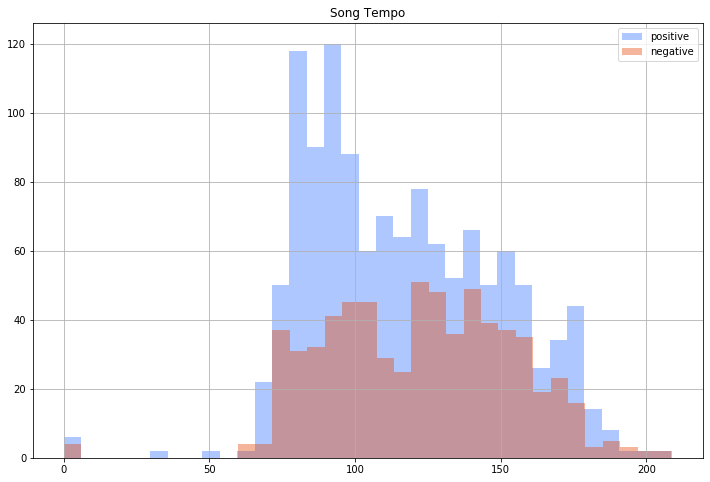

In [14]:
fig = plt.figure(figsize=(12, 8))
plt.title("Song Tempo")
pos_tempo.hist(alpha=0.4, bins=35, label="positive")
neg_tempo.hist(alpha=0.4, bins=35, label="negative")
plt.legend(loc='upper right')
plt.show()

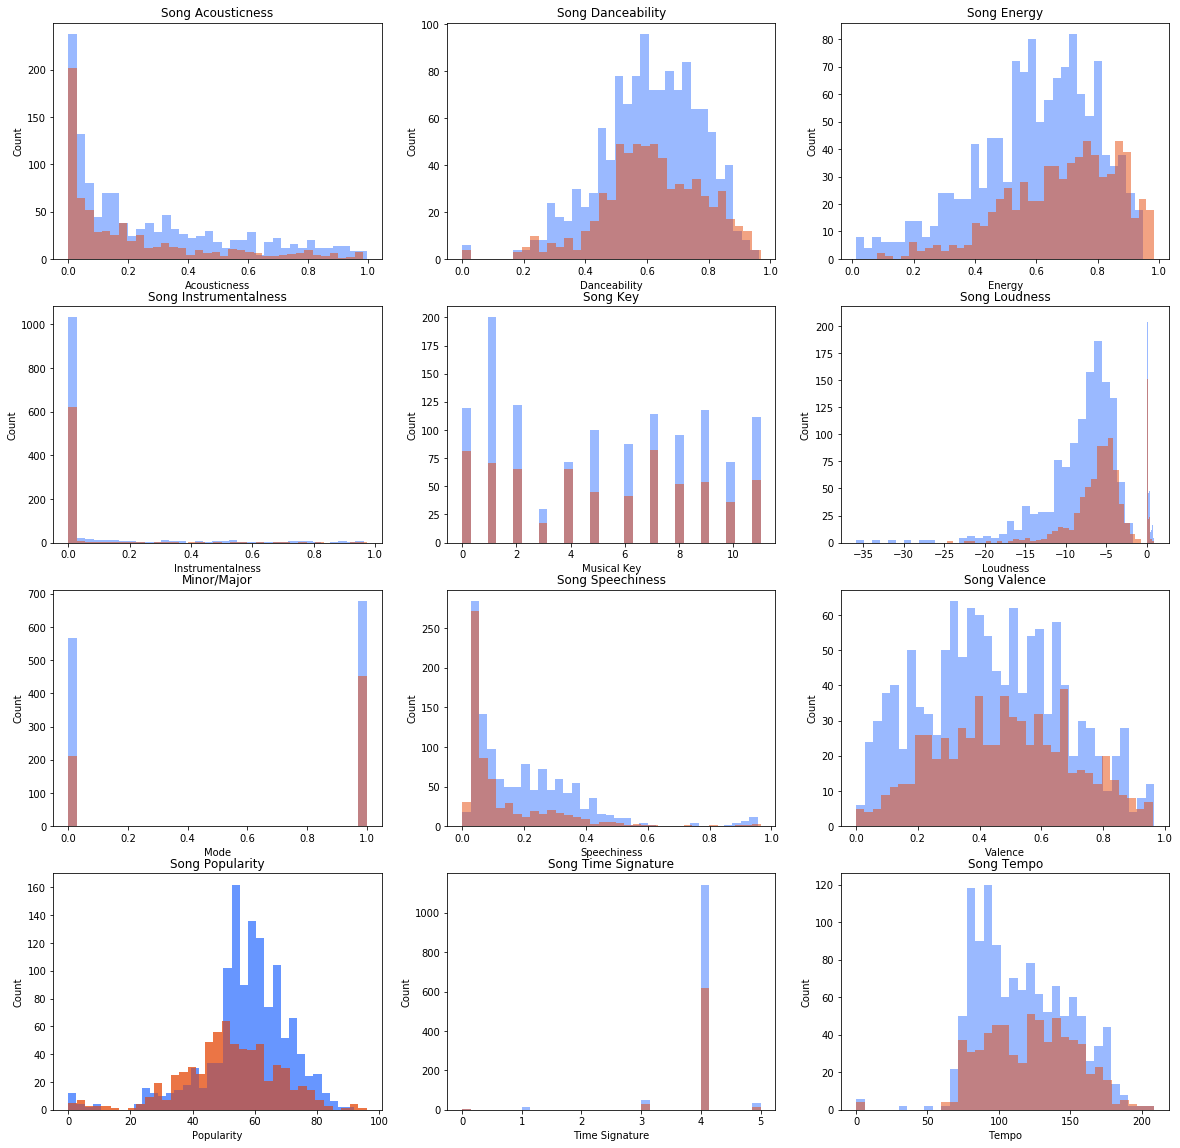

In [15]:
subp,axes = plt.subplots(4,3,sharex=False,figsize=(20, 20) )

#Acousticness

axes[0,0].set_xlabel('Acousticness')
axes[0,0].set_ylabel('Count')
axes[0,0].set_title('Song Acousticness')
axes[0,0].hist(pos_acousticness, alpha=0.5, bins=35)
axes[0,0].hist(neg_acousticness, alpha= 0.5, bins=35)


#Danceability

axes[0,1].set_xlabel('Danceability')
axes[0,1].set_ylabel('Count')
axes[0,1].set_title('Song Danceability')
axes[0,1].hist(pos_dance, alpha=0.5, bins=35)
axes[0,1].hist(neg_dance, alpha= 0.5, bins=35)


#Duration_ms
# axes[1,2].set_xlabel('Duration in ms')
# axes[1,2].set_ylabel('Count')
# axes[1,2].set_title('Song duration')
# axes[1,2].hist(pos_duration, alpha=0.5, bins=35)
# axes[1,2].hist(neg_duration, alpha= 0.5, bins=35)

#Energy
axes[0,2].set_xlabel('Energy')
axes[0,2].set_ylabel('Count')
axes[0,2].set_title('Song Energy')
axes[0,2].hist(pos_energy, alpha=0.5, bins=35)
axes[0,2].hist(neg_energy, alpha= 0.5, bins=35)

#Instrumentalness
axes[1,0].set_xlabel('Instrumentalness')
axes[1,0].set_ylabel('Count')
axes[1,0].set_title('Song Instrumentalness')
axes[1,0].hist(pos_instrumentalness, alpha=0.5, bins=35)
axes[1,0].hist(neg_instrumentalness, alpha= 0.5, bins=35)

#Musical key
axes[1,1].set_xlabel('Musical Key')
axes[1,1].set_ylabel('Count')
axes[1,1].set_title('Song Key')
axes[1,1].hist(pos_key, alpha=0.5, bins=35)
axes[1,1].hist(neg_key, alpha= 0.5, bins=35)

#Liveness
axes[1,2].set_xlabel('Liveness')
axes[1,2].set_ylabel('Count')
axes[1,2].set_title('Song Liveness')
axes[1,2].hist(pos_liveness, alpha=0.5, bins=35)
axes[1,2].hist(neg_liveness, alpha= 0.5, bins=35)

#Loudness
axes[1,2].set_xlabel('Loudness')
axes[1,2].set_ylabel('Count')
axes[1,2].set_title('Song Loudness')
axes[1,2].hist(pos_loudness, alpha=0.5, bins=35)
axes[1,2].hist(neg_loudness, alpha= 0.5, bins=35)

#Minor/Major
axes[2,0].set_xlabel('Mode')
axes[2,0].set_ylabel('Count')
axes[2,0].set_title('Minor/Major') #0 represents minor, 1 represents major
axes[2,0].hist(pos_mode, alpha=0.5, bins=35)
axes[2,0].hist(neg_mode, alpha= 0.5, bins=35)

#Speechiness
axes[2,1].set_xlabel('Speechiness')
axes[2,1].set_ylabel('Count')
axes[2,1].set_title('Song Speechiness')
axes[2,1].hist(pos_speechiness, alpha=0.5, bins=35)
axes[2,1].hist(neg_speechiness, alpha= 0.5, bins=35)

#Valence
axes[2,2].set_xlabel('Valence')
axes[2,2].set_ylabel('Count')
axes[2,2].set_title('Song Valence')
axes[2,2].hist(pos_valence, alpha=0.5, bins=35)
axes[2,2].hist(neg_valence, alpha= 0.5, bins=35)

#Song popularity
axes[3,0].set_xlabel('Popularity')
axes[3,0].set_ylabel('Count')
axes[3,0].set_title('Song Popularity')
axes[3,0].hist(pos_popularity, alpha=0.5, bins=35)
axes[3,0].hist(neg_popularity, alpha= 0.5, bins=35)

#Track popularity
axes[3,0].set_xlabel('Popularity')
axes[3,0].set_ylabel('Count')
axes[3,0].set_title('Song Popularity')
axes[3,0].hist(pos_popularity, alpha=0.5, bins=35)
axes[3,0].hist(neg_popularity, alpha= 0.5, bins=35)

#Time Signature
axes[3,1].set_xlabel('Time Signature')
axes[3,1].set_ylabel('Count')
axes[3,1].set_title('Song Time Signature')
axes[3,1].hist(pos_signature, alpha=0.5, bins=35)
axes[3,1].hist(neg_signature, alpha= 0.5, bins=35)

#Tempo (Again)
axes[3,2].set_xlabel('Tempo')
axes[3,2].set_ylabel('Count')
axes[3,2].set_title('Song Tempo')
axes[3,2].hist(pos_tempo, alpha=0.5, bins=35)
axes[3,2].hist(neg_tempo, alpha= 0.5, bins=35)


plt.show()

In [16]:
features = ["danceability", "loudness", "valence", "energy", "instrumentalness", "acousticness", "key", "duration_ms", "speechiness"]


In [17]:
x_train = train[features]
y_train = train["rating"]

x_test = test[features]
y_test = test["rating"]

y_train = y_train.fillna(0) #get rid of NaN


<h3>Decision Tree Classifier

In [18]:
results = {}

c = DecisionTreeClassifier(min_samples_split=100)
dt = c.fit(x_train, y_train)

y_pred = c.predict(x_test)
dt_score = accuracy_score(y_test, y_pred) * 100
results.update({'Decision Tree Classifier' : dt_score})
print("Accuracy using Decision Tree: ", round(dt_score, 1), "%")

Accuracy using Decision Tree:  76.0 %


<h3>More Alogrithms

In [19]:
#knn
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(3)
knn.fit(x_train, y_train)
knn_pred = c.predict(x_test)
knn_score = accuracy_score(y_test, knn_pred) * 100
results.update({'KNN' : knn_score})
print("Accuracy using Knn Tree: ", round(knn_score, 1), "%")

Accuracy using Knn Tree:  76.0 %


In [20]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier()
mlp.fit(x_train, y_train)
mlp_pred = mlp.predict(x_test)
mlp_score = accuracy_score(y_test, mlp_pred) * 100
results.update({'MLP Classifier' : mlp_score})
print("Accuracy using mlp Tree: ", round(mlp_score, 1), "%")

Accuracy using mlp Tree:  35.9 %


C:\Users\rahul\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [21]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)
forest.fit(x_train, y_train)
forest_pred = forest.predict(x_test)
from sklearn.metrics import accuracy_score
forest_score = accuracy_score(y_test, forest_pred) * 100
results.update({'Random Forest Classifier' : forest_score})
print("Accuracy using random forest: ", round(forest_score, 1), "%")

Accuracy using random forest:  74.9 %


In [22]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=100)
ada.fit(x_train, y_train)
ada_pred = ada.predict(x_test)
from sklearn.metrics import accuracy_score
ada_score = accuracy_score(y_test, ada_pred) * 100
results.update({'AdaBoost Classifier' : ada_score})
print("Accuracy using ada: ", round(ada_score, 1), "%")

Accuracy using ada:  77.7 %


In [23]:
from sklearn.ensemble import GradientBoostingClassifier
grad = GradientBoostingClassifier(n_estimators=100, learning_rate=.1, max_depth=1, random_state=0)
grad.fit(x_train, y_train)
predicted = grad.predict(x_test)
grad_score = accuracy_score(y_test, predicted)*100
results.update({'Gradient Boosting Classifier' : grad_score})
print("Accuracy using Gradient Boosting Classifier: ", round(grad_score, 1), "%")

Accuracy using Gradient Boosting Classifier:  76.0 %


In [24]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
gpc = GaussianProcessClassifier(1.0 * RBF(1.0), warm_start=True)
gpc.fit(x_train, y_train)
gpc_pred = gpc.predict(x_test)
from sklearn.metrics import accuracy_score
gpc_score = accuracy_score(y_test, gpc_pred) * 100
results.update({'Gaussian Process Classifier' : gpc_score})
print("Accuracy using gpc: ", round(gpc_score, 1), "%")

Accuracy using gpc:  93.4 %


In [25]:
Keymax = max(results, key=results.get) 
print("The best algorithm is: {}!".format(Keymax))

The best algorithm is: Gaussian Process Classifier!


# Curate Tracks

In [26]:
username = "rocker517"
scope = 'playlist-modify-private playlist-modify-public playlist-read-private user-library-read'

SPOTIPY_CLIENT_ID = 'Insert Client ID'
SPOTIPY_CLIENT_SECRET = '' 
SPOTIPY_REDIRECT_URI = "http://www.example.com/callback/"

token = util.prompt_for_user_token(
        username=username,
        scope=scope,
        client_id=SPOTIPY_CLIENT_ID,
        client_secret=SPOTIPY_CLIENT_SECRET,
        redirect_uri=SPOTIPY_REDIRECT_URI)

sp = spotipy.Spotify(auth=token)

In [27]:
base_playlist = sp.user_playlist("spotify", "37i9dQZF1DX45xYefy6tIi")

new_playlist_tracks = base_playlist["tracks"]
new_playlist_songs = new_playlist_tracks["items"]
while new_playlist_tracks['next']:
    new_playlist_tracks = sp.next(new_playlist_tracks)
    for song in new_playlist_tracks["items"]:
        new_playlist_songs.append(song)

new_playlist_song_ids = []
num_songs = len(new_playlist_songs)
print(num_songs)
for i in range(num_songs):
    new_playlist_song_ids.append(new_playlist_songs[i]['track']['id'])
 
new_playlist_features = []
track_num = 0
for i in range(0, len(new_playlist_song_ids), 100): #can only get features for 100 tracks at a time
    tracks = sp.audio_features(new_playlist_song_ids[i:i+100])
    for track in tracks:
        if track:
            track['song_title'] = new_playlist_songs[track_num]['track']['name']
            track['artist'] = new_playlist_songs[track_num]['track']['artists'][0]['name']
            track_num = track_num + 1
            new_playlist_features.append(track)
print(len(new_playlist_features))

new_features = pd.DataFrame(new_playlist_features)
new_features.head()
            

55
55


,acousticness,analysis_url,artist,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,song_title,speechiness,tempo,time_signature,track_href,type,uri,valence
0,0.06470,https://api.spotify.com/v1/audio-analysis/4OV0...,The Alan Parsons Project,0.624,115280,0.396,4OV0sRTFrZLXaZZ1sS9hLn,0.909000,4,0.1130,-15.411,1,Sirius - Chicago Bulls Theme Song,0.0340,111.401,4,https://api.spotify.com/v1/tracks/4OV0sRTFrZLX...,audio_features,spotify:track:4OV0sRTFrZLXaZZ1sS9hLn,0.0388
1,0.00763,https://api.spotify.com/v1/audio-analysis/5xXL...,KRS-One,0.803,289907,0.806,5xXL4i9L2ZbKBtENNh8fWY,0.005360,0,0.1010,-7.805,1,Step into a World (Rapture's Delight),0.2650,94.993,4,https://api.spotify.com/v1/tracks/5xXL4i9L2ZbK...,audio_features,spotify:track:5xXL4i9L2ZbKBtENNh8fWY,0.6180
2,0.07000,https://api.spotify.com/v1/audio-analysis/2oSP...,Run–D.M.C.,0.786,302627,0.637,2oSPru8bef0EMhF9tvMSLn,0.000013,1,0.4150,-12.149,1,Down With the King,0.2050,96.023,4,https://api.spotify.com/v1/tracks/2oSPru8bef0E...,audio_features,spotify:track:2oSPru8bef0EMhF9tvMSLn,0.7620
3,0.00058,https://api.spotify.com/v1/audio-analysis/1njo...,Soul Coughing,0.689,211040,0.723,1njobA8NxcOtPIbLdrip0T,0.120000,1,0.1200,-8.689,1,Super Bon Bon,0.0312,98.583,4,https://api.spotify.com/v1/tracks/1njobA8NxcOt...,audio_features,spotify:track:1njobA8NxcOtPIbLdrip0T,0.9160
4,0.03890,https://api.spotify.com/v1/audio-analysis/3QlT...,Coolio,0.888,334440,0.584,3QlTzofanSqDWywxEzGGE2,0.000003,7,0.0625,-13.308,1,Fantastic Voyage,0.1120,104.704,4,https://api.spotify.com/v1/tracks/3QlTzofanSqD...,audio_features,spotify:track:3QlTzofanSqDWywxEzGGE2,0.7620


In [30]:
matches = gpc.predict(new_features[features])

count = 0
idx = 0
for match in matches:
    if(match == 1):
        count += 1
        print("Song: " + new_features["song_title"][idx] + "; by: "+ new_features["artist"][idx])
    idx +=1

print("There are {} songs in this playlist that you may like".format(count))      
        

Song: Can I Kick It?, By: A Tribe Called Quest
Song: Adagio in D Minor, By: John Murphy
Song: Partyman, By: Prince
Song: Still Not a Player (feat. Joe) - Radio Version, By: Big Pun
Song: Sur le boulevard du rythm'funky, By: Soon E Mc
Song: Work, By: Gang Starr
Song: It's Yourz, By: Wu-Tang Clan
There are 7 songs in this playlist that you may like
